Found 1938 files belonging to 6 classes.
Using 1551 files for training.
Found 1938 files belonging to 6 classes.
Using 387 files for validation.
Epoch 1/10
49/49 [==============================] - 18s 280ms/step - loss: 4.4884 - accuracy: 0.3237 - val_loss: 4.5243 - val_accuracy: 0.2920
Epoch 2/10
49/49 [==============================] - 15s 270ms/step - loss: 2.9742 - accuracy: 0.4043 - val_loss: 2.9877 - val_accuracy: 0.3902
Epoch 3/10
49/49 [==============================] - 14s 265ms/step - loss: 2.4974 - accuracy: 0.4481 - val_loss: 2.2253 - val_accuracy: 0.4832
Epoch 4/10
49/49 [==============================] - 14s 253ms/step - loss: 2.0785 - accuracy: 0.5242 - val_loss: 1.8783 - val_accuracy: 0.5245
Epoch 5/10
49/49 [==============================] - 17s 287ms/step - loss: 1.7632 - accuracy: 0.5867 - val_loss: 1.5300 - val_accuracy: 0.6021
Epoch 6/10
49/49 [==============================] - 14s 260ms/step - loss: 1.5958 - accuracy: 0.6125 - val_loss: 1.3334 - val_accuracy: 0.64

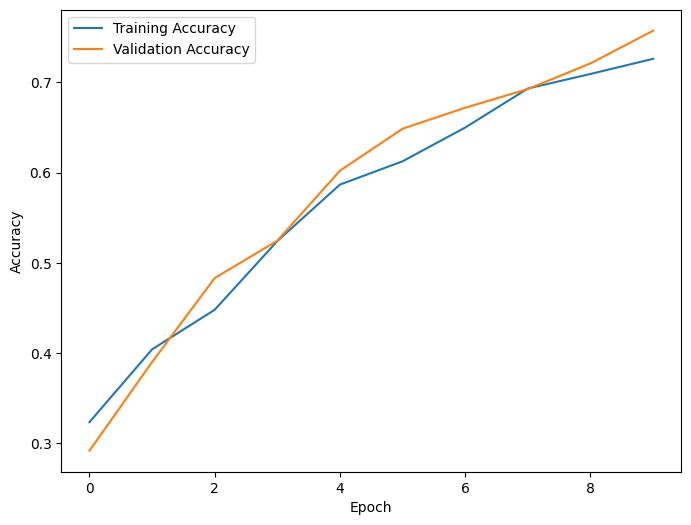

13/13 [==============================] - 3s 96ms/step - loss: 0.9131 - accuracy: 0.7571
Test Loss: 0.9131335020065308
Test Accuracy: 0.7571059465408325
13/13 [==============================] - 3s 105ms/step


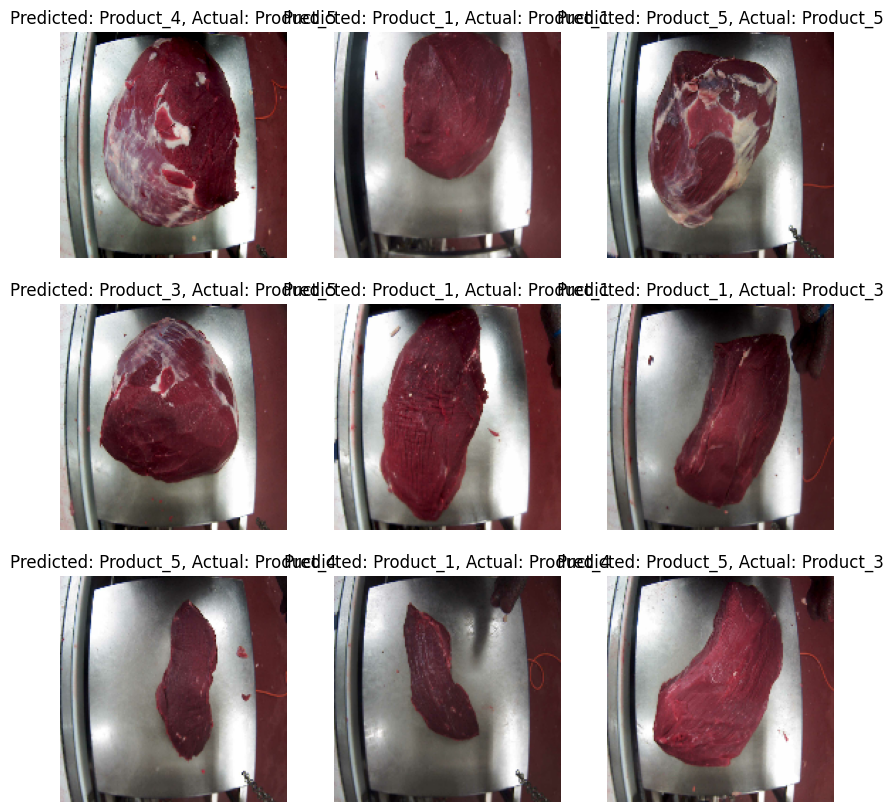

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import tensorflow as tf
from keras.applications import VGG16

# Load the dataset
data_dir = '/content/drive/MyDrive/MLPR Images-20240422T103358Z-001/MLPR Images'  # Change this to your dataset directory

# Define image dimensions and batch size
batch_size = 32
img_height = 160
img_width = 160

# Create training and validation datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Get class names
class_names = train_dataset.class_names


# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
])

# Preprocess input images
preprocess_input = tf.keras.applications.vgg16.preprocess_input

# Create base model (MobileNetV2)


base_model = VGG16( input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Create the model
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
base_learning_rate = 0.0001
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the model
initial_epochs = 10
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=initial_epochs
)

# Plot training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test dataset
test_loss, test_accuracy = model.evaluate(validation_dataset)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions
predictions = model.predict(validation_dataset)
predicted_labels = np.argmax(predictions, axis=1)

# Visualize predictions
plt.figure(figsize=(10, 10))
for images, labels in validation_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f'Predicted: {class_names[predicted_labels[i]]}, Actual: {class_names[labels[i]]}')
        plt.axis("off")
plt.show()

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  19


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10),  # Use a smaller learning rate
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Epoch 10/15
49/49 [==============================] - 16s 288ms/step - loss: 0.8433 - accuracy: 0.7743 - val_loss: 0.8669 - val_accuracy: 0.7778
Epoch 11/15
49/49 [==============================] - 14s 262ms/step - loss: 0.8502 - accuracy: 0.7718 - val_loss: 0.8608 - val_accuracy: 0.7752
Epoch 12/15
49/49 [==============================] - 17s 291ms/step - loss: 0.8577 - accuracy: 0.7705 - val_loss: 0.8497 - val_accuracy: 0.7829
Epoch 13/15
49/49 [==============================] - 14s 263ms/step - loss: 0.8715 - accuracy: 0.7718 - val_loss: 0.8465 - val_accuracy: 0.7881
Epoch 14/15
49/49 [==============================] - 15s 262ms/step - loss: 0.8998 - accuracy: 0.7602 - val_loss: 0.8358 - val_accuracy: 0.7907
Epoch 15/15
49/49 [==============================] - 16s 288ms/step - loss: 0.9115 - accuracy: 0.7576 - val_loss: 0.8250 - val_accuracy: 0.7907


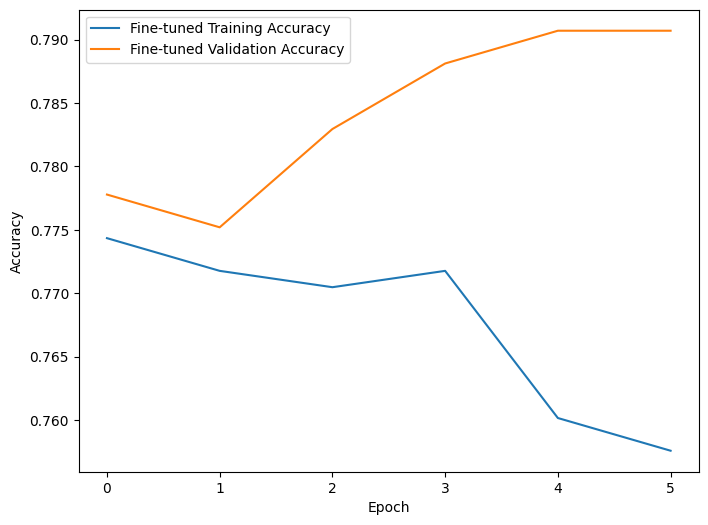

13/13 [==============================] - 5s 118ms/step - loss: 0.8250 - accuracy: 0.7907
Fine-tuned Model Test Loss: 0.8249518275260925
Fine-tuned Model Test Accuracy: 0.7906976938247681


In [ ]:
# Train the model again with fine-tuning
fine_tune_epochs = 5  # You can adjust this
total_epochs = initial_epochs + fine_tune_epochs

history_fine_tune = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1]  # Start from the last epoch of previous training
)
# Plot training history including fine-tuning
plt.figure(figsize=(8, 6))
plt.plot(history_fine_tune.history['accuracy'], label='Fine-tuned Training Accuracy')
plt.plot(history_fine_tune.history['val_accuracy'], label='Fine-tuned Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
test_loss_fine_tune, test_accuracy_fine_tune = model.evaluate(validation_dataset)
print('Fine-tuned Model Test Loss:', test_loss_fine_tune)
print('Fine-tuned Model Test Accuracy:', test_accuracy_fine_tune)